In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
from datetime import datetime

# Load actors with score

In [22]:
actors = pd.read_csv('fomc_scorecard.csv', sep=";", index_col=3, header=0)

In [24]:
actors

,Name,Score,Shifted score
Article name,,,
Janet Yellen,"Janet L. Yellen, Chair",-1,1
Stanley Fischer,Stanley Fischer,0,2
Lael Brainard,Lael Brainard,-2,0
Jerome Powell,Jerome H. Powell,0,2
Daniel Tarullo,Daniel K. Tarullo,-2,0
William Dudley,"William C. Dudley, Vice Chairman",-1,1
James Bullard,James Bullard,1,3
Esther George,Esther L. George,2,4
Loretta Mester,Loretta J. Mester,1,3


# Load articles

In [25]:
from pymongo import MongoClient

In [26]:
client = MongoClient('localhost', 27017)
fomc_collection = client.python_import.fomc_articles_new

In [27]:
fomc_articles = pd.DataFrame(list(fomc_collection.find()))
fomc_articles.set_index('_id', inplace=True)
fomc_articles.head()

,ParticipantJobTitle,ParticipantLocation,ParticipantName,ParticipantTitleLastName,ParticipantUrl,RemarkDate,RemarkDescription,RemarkType,content,date,url
_id,,,,,,,,,,,
58c7d5593740f52798100a3c,Pres.,Richmond,Jeffrey Lacker,Pres. Lacker,/fomcspeak/jeffrey-lacker,"Dec. 03, 2013",Lacker Testifies on Bankruptcy and Financial I...,Testimony,\r Careers \r \r Conferences & Events \r Presi...,2013-12-03 00:00:00,https://www.richmondfed.org/press_room/speeche...
58c7d5593740f52798100a3d,Gov.,Board of Governors,Jerome Powell,Gov. Powell,/fomcspeak/jerome-powell,"Oct. 11, 2013 (11:00 AM ET)",Communications Challenges and Quantitative Easing,Panel Discussion,Communications Challenges and Quantitative Eas...,2013-10-11 11:00:00,https://www.federalreserve.gov/newsevents/spee...
58c7d55a3740f52798100a3e,Pres.,Federal Reserve Bank of Dallas,Richard Fisher,Pres. Fisher,/fomcspeak/pastparticipants/richard-fisher,"Aug. 22, 2013",Fed's Fisher: September Is Time to Start Taper,Video Interview,Connecting decision makers to a dynamic networ...,2013-08-22 00:00:00,https://www.bloomberg.com/news/videos/b/dfc53f...
58c7d55c3740f52798100a3f,Gov.,Board of Governors,Jerome Powell,Gov. Powell,/fomcspeak/jerome-powell,"Jul. 02, 2013 (5:45 PM ET)",International Financial Regulatory Reform,Speech,International Financial Regulatory Reform \n ...,2013-07-02 05:45:00,https://www.federalreserve.gov/newsevents/spee...
58c7d55d3740f52798100a40,Pres.,Federal Reserve Bank of Philadelphia,Charles Plosser,Pres. Plosser,/fomcspeak/pastparticipants/charles-plosser,"May. 16, 2013",Plosser: Holding MBS Not Good for Fed,Video Interview,Connecting decision makers to a dynamic networ...,2013-05-16 00:00:00,https://www.bloomberg.com/news/videos/b/8df903...


In [29]:
fomc_articles['ParticipantName'].unique()

array(['Jeffrey Lacker', 'Jerome Powell', 'Richard Fisher',
       'Charles Plosser', 'Ben Bernanke', 'Daniel Tarullo',
       'Sarah Bloom Raskin', 'Charles Evans', 'Jeremy Stein',
       'Narayana Kocherlakota', 'Dennis Lockhart', 'Eric Rosengren',
       'John Williams', 'Sandra Pianalto', 'Elizabeth Duke',
       'James Bullard', 'Janet Yellen', 'William Dudley', 'Esther George',
       'Loretta Mester', 'Stanley Fischer', 'Lael Brainard',
       'Patrick Harker', 'Robert Kaplan', 'Neel Kashkari'], dtype=object)

In [54]:
len(fomc_articles['ParticipantName'].unique())

25

In [30]:
actors.index

Index(['Janet Yellen', 'Stanley Fischer', 'Lael Brainard', 'Jerome Powell',
       'Daniel Tarullo', 'William Dudley', 'James Bullard', 'Esther George',
       'Loretta Mester', 'Eric Rosengren', 'Charles Evans', 'Patrick Harker',
       'Robert Kaplan', 'Neel Kashkari', 'Jeffrey Lacker', 'Dennis Lockhart',
       'John Williams'],
      dtype='object', name='Article name')

In [55]:
len(actors.index)

17

#### There is a difference in the score sheet and the unique actors: 17 vs 25
---

# Merge articles and actors score

In [39]:
fomc_articles_scored = fomc_articles.merge(actors, left_on='ParticipantName', right_index=True)
fomc_articles_scored.head(3)

,ParticipantJobTitle,ParticipantLocation,ParticipantName,ParticipantTitleLastName,ParticipantUrl,RemarkDate,RemarkDescription,RemarkType,content,date,url,Name,Score,Shifted score
_id,,,,,,,,,,,,,,
58c7d5593740f52798100a3c,Pres.,Richmond,Jeffrey Lacker,Pres. Lacker,/fomcspeak/jeffrey-lacker,"Dec. 03, 2013",Lacker Testifies on Bankruptcy and Financial I...,Testimony,\r Careers \r \r Conferences & Events \r Presi...,2013-12-03 00:00:00,https://www.richmondfed.org/press_room/speeche...,Jeffrey M. Lacker,2,4
58c7d5693740f52798100a66,Pres.,Richmond,Jeffrey Lacker,Pres. Lacker,/fomcspeak/jeffrey-lacker,"Feb. 12, 2013 (7:30 PM ET)",Economics and the Federal Reserve After the Cr...,Speech,\r Careers \r \r Conferences & Events \r Presi...,2013-02-12 07:30:00,https://www.richmondfed.org/press_room/speeche...,Jeffrey M. Lacker,2,4
58c7d56e3740f52798100a7c,Pres.,Richmond,Jeffrey Lacker,Pres. Lacker,/fomcspeak/jeffrey-lacker,"Apr. 02, 2013 (7:30 PM ET)",Richmond Fed's Lacker and Chicago Fed's Evans ...,Panel Discussion,\r Careers \r \r Conferences & Events \r Richm...,2013-04-02 07:30:00,https://www.richmondfed.org/press_room/appeara...,Jeffrey M. Lacker,2,4


# Number of articles in each score class

In [53]:
fomc_articles_scored.groupby('Shifted score')['url'].count()

Shifted score
0    172
1    191
2    275
3    186
4     93
Name: url, dtype: int64

# Create train data and test data

In [61]:
train_data = fomc_articles_scored[fomc_articles_scored['date'] < datetime(2016, 1, 1)]
test_data = fomc_articles_scored[fomc_articles_scored['date'] >= datetime(2016, 1, 1)]

In [63]:
X_train = train_data['content']
y_train = train_data['Shifted score']
X_test = test_data['content']
y_test = test_data['Shifted score']

In [68]:
X_train.head()

_id
58c7d5593740f52798100a3c    \r Careers \r \r Conferences & Events \r Presi...
58c7d5693740f52798100a66    \r Careers \r \r Conferences & Events \r Presi...
58c7d56e3740f52798100a7c    \r Careers \r \r Conferences & Events \r Richm...
58c7d5723740f52798100a8d    \r Careers \r \r Conferences & Events \r Presi...
58c7d5733740f52798100a94    In an exclusive interview, CNBC's Steve Liesma...
Name: content, dtype: object

In [69]:
y_train.head()

_id
58c7d5593740f52798100a3c    4
58c7d5693740f52798100a66    4
58c7d56e3740f52798100a7c    4
58c7d5723740f52798100a8d    4
58c7d5733740f52798100a94    4
Name: Shifted score, dtype: int64

# Create TF matrix from CountVectorizer

In [133]:
vectorizer = CountVectorizer(ngram_range=(1,3), max_df=0.7, min_df=3)

In [134]:
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.7, max_features=None, min_df=3,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [123]:
vectorizer.get_feature_names()

['00',
 '000',
 '000 among',
 '000 and',
 '000 as',
 '000 average',
 '000 banks',
 '000 banks failed',
 '000 banks in',
 '000 compared',
 '000 for',
 '000 in',
 '000 in april',
 '000 in the',
 '000 jobs',
 '000 jobs and',
 '000 jobs in',
 '000 jobs month',
 '000 jobs per',
 '000 mark',
 '000 mark for',
 '000 month',
 '000 new',
 '000 new jobs',
 '000 or',
 '000 over',
 '000 over the',
 '000 people',
 '000 per',
 '000 per month',
 '000 plus',
 '000 since',
 '005',
 '005 washington',
 '005 washington board',
 '01',
 '01 january',
 '01 january friedman',
 '010',
 '010 washington',
 '018c',
 '018c st',
 '018c st louis',
 '02',
 '02 2015',
 '0207',
 '0207 mobile',
 '0207 mobile laura',
 '03',
 '039',
 '04',
 '05',
 '05 february',
 '05 february 14',
 '06',
 '06 june',
 '06 june 2014',
 '06 tightening',
 '06 tightening cycle',
 '07',
 '08',
 '08 january',
 '09',
 '09 washington',
 '0927',
 '0927 mobile',
 '10 2012',
 '10 2015',
 '10 _adloadcallback',
 '10 _adloadcallback override',
 '10 _clon

In [124]:
len(vectorizer.get_feature_names())

129927

In [135]:
X_train_dtm = vectorizer.transform(X_train)

In [136]:
X_test_dtm = vectorizer.transform(X_test)
X_test_dtm

<345x130203 sparse matrix of type '<class 'numpy.int64'>'
	with 706598 stored elements in Compressed Sparse Row format>

# Building a model

In [137]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [138]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [139]:
y_pred_class = nb.predict(X_test_dtm)

In [130]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [140]:
accuracy_score(y_test, y_pred_class)

0.70144927536231882

#### Confusion matrix
By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` but
predicted to be in group :math:`j`.

In [141]:
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[33,  2, 23,  5,  0],
       [ 1, 49, 34,  2,  0],
       [ 8,  5, 80,  7,  3],
       [ 0,  0,  2, 69,  0],
       [ 0,  0, 10,  1, 11]])

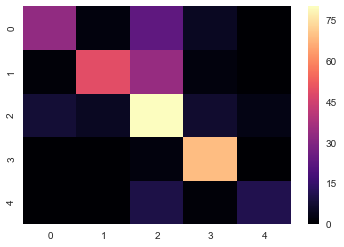

In [149]:
sns.heatmap(cm, cmap='magma')

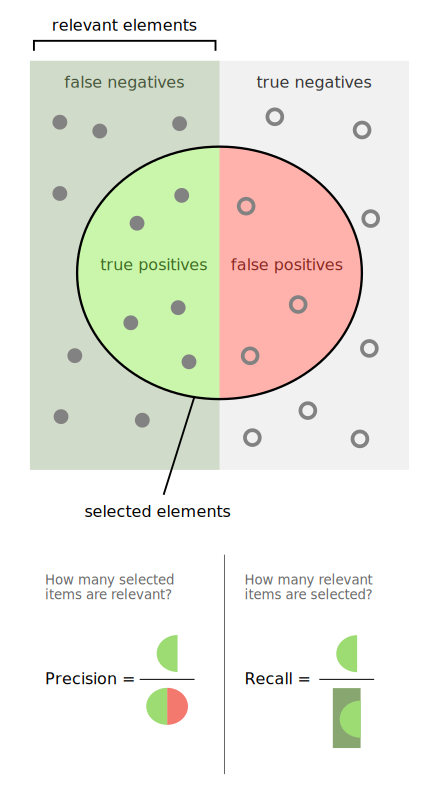

In [142]:
from IPython.display import SVG, display
def show_svg():
    display(SVG(url='https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg'))
show_svg()

In [143]:
cr = classification_report(y_test, y_pred_class)
print(cr)

             precision    recall  f1-score   support

          0       0.79      0.52      0.63        63
          1       0.88      0.57      0.69        86
          2       0.54      0.78      0.63       103
          3       0.82      0.97      0.89        71
          4       0.79      0.50      0.61        22

avg / total       0.74      0.70      0.70       345

